In [1]:
from mxnet import ndarray as nd
from mxnet import autograd

num_inputs=2
num_examples=1000

true_w=[2,-3.4]
true_b=4.2

X=nd.random_normal(shape=(num_examples, num_inputs))
y=true_w[0]*X[:,0]+true_w[1]*X[:,1]+true_b
y+=0.1*nd.random_normal(shape=y.shape)


In [2]:
print(X[999],y[999])


[-1.64971924 -0.77995312]
<NDArray 2 @cpu(0)> 
[ 3.53872013]
<NDArray 1 @cpu(0)>


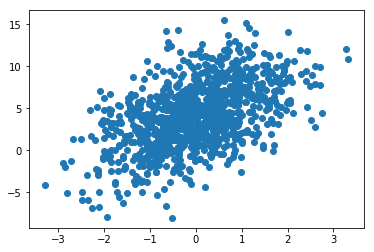

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0].asnumpy(),y.asnumpy())
plt.show()

In [14]:
import random 
batch_size=10
def data_iter():
    idx=list(range(num_examples))
    random.shuffle(idx)
    for i in range(0,num_examples,batch_size):
        j=nd.array(idx[i:min(i+batch_size,num_examples)])
        yield nd.take(X,j), nd.take(y,j)

In [15]:
for data,label in data_iter():
    print(data,label)
    break


[[-1.4252485  -1.59088528]
 [ 0.3229059  -0.80409235]
 [-0.07855341  0.9088164 ]
 [ 0.84497333 -0.12950364]
 [ 0.38556749 -1.11353862]
 [-0.33870387  0.04434407]
 [ 0.87821692  0.7000246 ]
 [ 0.15614767  0.40446803]
 [-0.11610305  2.29168987]
 [ 0.94159871 -0.55673403]]
<NDArray 10x2 @cpu(0)> 
[ 6.68241501  7.58391333  0.97388792  6.46427965  8.64529419  3.25319386
  3.52194023  3.10331082 -3.98167038  7.9543128 ]
<NDArray 10 @cpu(0)>


In [16]:
w=nd.random_normal(shape=(num_inputs,1))
b=nd.zeros((1,))
params=[w,b]

In [17]:
print(params)

[
[[ 0.96285337]
 [ 0.47811309]]
<NDArray 2x1 @cpu(0)>, 
[ 0.]
<NDArray 1 @cpu(0)>]


In [18]:
for param in params:
    param.attach_grad()

In [19]:
def net(X):
    return nd.dot(X,w)+b

In [20]:
def square_loss(yhat,y):
    return (yhat-y.reshape(yhat.shape))**2

In [21]:
def SGD(params, lr):
    for param in params:
        param[:]=param-lr*param.grad

In [25]:

# 模型函数
def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2
# 绘制损失随训练次数降低的折线图，以及预测值和真实值的散点图
def plot(losses, X, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             net(X[:sample_size, :]).asnumpy(), 'or', label='Estimated')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             real_fn(X[:sample_size, :]).asnumpy(), '*g', label='Real')
    fg2.legend()
    plt.show()

Epoch 0, batch 99. Moving avg of loss: 0.01119436863. Average loss: 0.011435


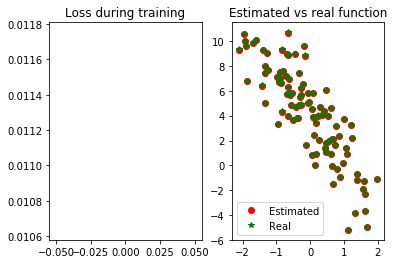

Epoch 1, batch 199. Moving avg of loss: 0.00953497128644. Average loss: 0.009073


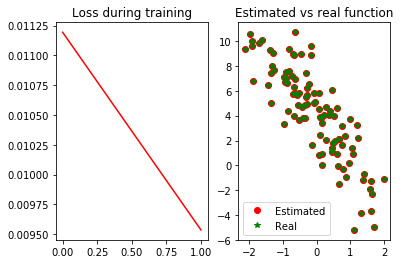

Epoch 2, batch 299. Moving avg of loss: 0.00933548102476. Average loss: 0.009095


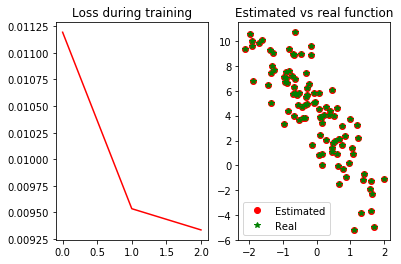

Epoch 3, batch 399. Moving avg of loss: 0.00911926918541. Average loss: 0.009065


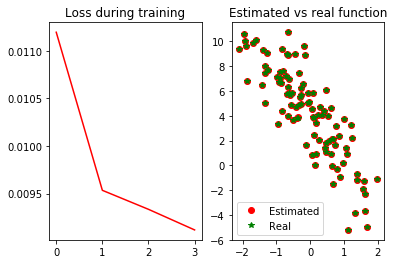

Epoch 4, batch 499. Moving avg of loss: 0.00928287122077. Average loss: 0.009091


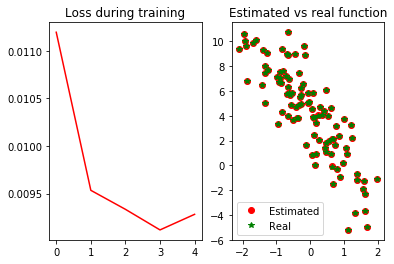

In [26]:
epochs = 5
learning_rate = .001
niter = 0
losses = []
moving_loss = 0
smoothing_constant = .01

# 训练
for e in range(epochs):
    total_loss = 0

    for data, label in data_iter():
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        total_loss += nd.sum(loss).asscalar()

        # 记录每读取一个数据点后，损失的移动平均值的变化；
        niter +=1
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss

        # correct the bias from the moving averages
        est_loss = moving_loss/(1-(1-smoothing_constant)**niter)

        if (niter + 1) % 100 == 0:
            losses.append(est_loss)
            print("Epoch %s, batch %s. Moving avg of loss: %s. Average loss: %f" % (e, niter, est_loss, total_loss/num_examples))
            plot(losses, X)

In [27]:
true_w, w

([2, -3.4], 
 [[ 2.00059152]
  [-3.39751554]]
 <NDArray 2x1 @cpu(0)>)

In [28]:
true_b, b

(4.2, 
 [ 4.20493507]
 <NDArray 1 @cpu(0)>)